In [9]:
import json
import matplotlib.pyplot as plt
import numpy as np
import math

In [10]:
with open("../Data/Simulations2/logs_ei_02-03-2023_23-51-45.json") as f:
    logs = json.load(f)
    
logs[0]

{'inj_i_mean': 123.15423522379037,
 'mid_i_mean': 104.64888593356467,
 'ext_i_mean': 99.23569811071899,
 'beam_current': 131.25900419249677,
 'time_cost': 6848.739874129782}

In [19]:
def extract_target_logs(fn, logdir="../Data/Simulations2/"):
    # extract beam_current from fn at logdir and return as a numpy array
    with open(logdir + fn) as f:
        logs = json.load(f)
    targets = np.array([log["beam_current"] for log in logs])
    return targets

def extract_time_logs(fn, logdir="../Data/Simulations2/"):
    # extract beam_current from fn at logdir and return as a numpy array
    with open(logdir + fn) as f:
        logs = json.load(f)
    targets = np.array([log["time_cost"] for log in logs])
    return targets

# extract_target_logs("logs_ei_02-03-2023_23-51-45.json", "../Data/Simulations2/")

In [24]:
# import OS module
import os
 
# Get the list of all files and directories
path = "../Data/Simulations2/"
dir_list = os.listdir(path)
len(dir_list)

212

In [25]:
def get_best(arr):
    # return an equal length array that records the best value seen so far
    best = np.array([arr[:i+1].max() for i in range(len(arr))])
    return best

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


104


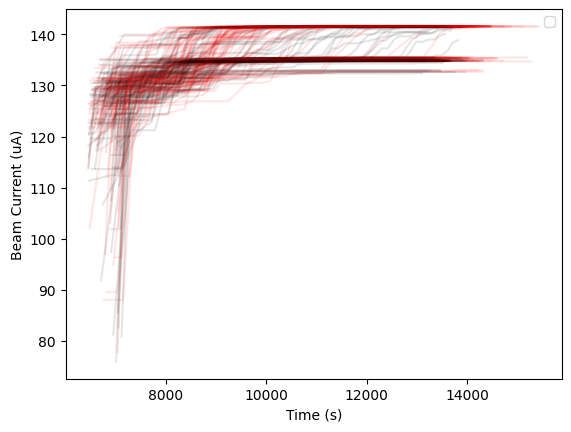

In [27]:
ei_logs = []
eipu_logs = []
ei_time = []
eipu_time = []

for log in dir_list:
    if 'eipu' in log:
        target_log = extract_target_logs(log)
        target_log = np.pad(target_log, (0, 55-len(target_log)))
        target_log = get_best(target_log)
        eipu_logs.append(target_log)
        eipu_time.append(extract_time_logs(log))
        plt.plot(extract_time_logs(log), target_log, c='black', alpha=0.1)
    elif 'ei' in log:
        target_log = extract_target_logs(log)
        target_log = np.pad(target_log, (0, 55-len(target_log)))
        target_log = get_best(target_log)
        ei_logs.append(target_log)
        ei_time.append(extract_time_logs(log))
        plt.plot(extract_time_logs(log), target_log, c='r', alpha=0.1)
        
print(len(eipu_logs))
# plt.plot(sum(eipu_logs)/len(eipu_logs), c='r', label='EIPU')
# plt.plot(sum(ei_logs)/len(ei_logs), c='black', label='EI')  
plt.xlabel("Time (s)")
plt.ylabel("Beam Current (uA)")
plt.legend()  
plt.show()

# plt.plot(extract_target_logs("logs_ei_17-02-2023_01-33-14.json"))
# plt.plot(extract_target_logs("logs_eipu_17-02-2023_01-32-21.json"))


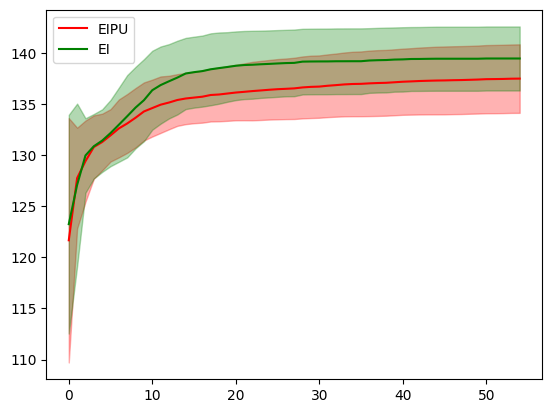

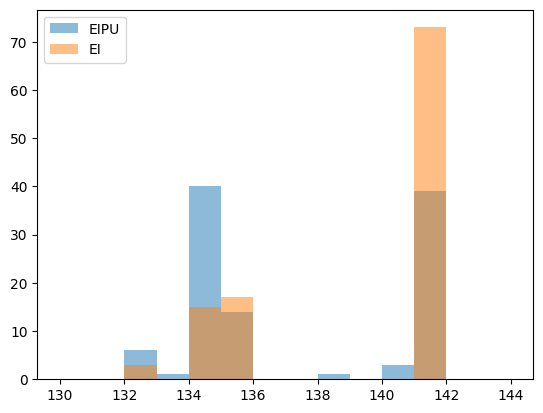

In [15]:
ei_logs = []
eipu_logs = []

for log in dir_list:
    if 'eipu' in log:
        target_log = extract_target_logs(log)
        target_log = np.pad(target_log, (0, 55-len(target_log)))
        target_log = get_best(target_log)
        eipu_logs.append(target_log)
    elif 'ei' in log:
        target_log = extract_target_logs(log)
        target_log = np.pad(target_log, (0, 55-len(target_log)))
        target_log = get_best(target_log)
        ei_logs.append(target_log)
        
eipu_mean = sum(eipu_logs)/len(eipu_logs)
ei_mean = sum(ei_logs)/len(ei_logs)
plt.plot(eipu_mean, c='r', label='EIPU')
eipu_ucb = eipu_mean + np.std(eipu_logs, axis=0)
eipu_lcb = eipu_mean - np.std(eipu_logs, axis=0)
plt.fill_between(range(55), eipu_ucb, eipu_lcb, color='r', alpha=0.3)

plt.plot(ei_mean, c='green', label='EI')
ei_ucb = ei_mean + np.std(ei_logs, axis=0)
ei_lcb = ei_mean - np.std(ei_logs, axis=0)
plt.fill_between(range(55), ei_ucb, ei_lcb, color='green', alpha=0.3)
plt.legend()  
plt.show()

plt.hist([log[-1] for log in eipu_logs], label="EIPU", alpha=0.5, bins=range(130,145,1))
plt.hist([log[-1] for log in ei_logs], label="EI", alpha=0.5, bins=range(130,145,1))
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (104, 55) and (55,)

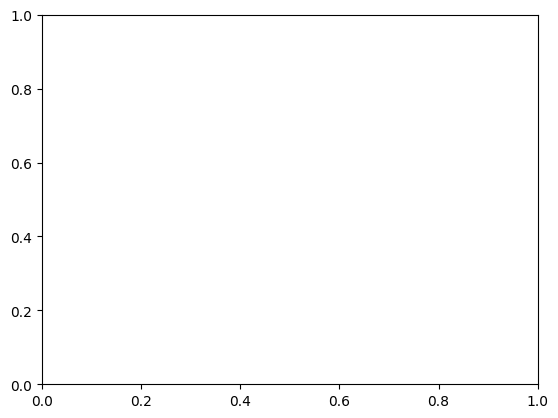

In [28]:
ei_logs = []
ei_time = []
eipu_logs = []
eipu_time = []

for log in dir_list:
    if 'eipu' in log:
        target_log = extract_target_logs(log)
        target_log = np.pad(target_log, (0, 55-len(target_log)))
        target_log = get_best(target_log)
        eipu_logs.append(target_log)
        eipu_time.append(extract_time_logs(log))
    elif 'ei' in log:
        target_log = extract_target_logs(log)
        target_log = np.pad(target_log, (0, 55-len(target_log)))
        target_log = get_best(target_log)
        ei_logs.append(target_log)
        ei_time.append(extract_time_logs(log))
        
eipu_mean = sum(eipu_logs)/len(eipu_logs)
ei_mean = sum(ei_logs)/len(ei_logs)
plt.plot(eipu_time, eipu_mean, c='r', label='EIPU')
eipu_ucb = eipu_mean + np.std(eipu_logs, axis=0)
eipu_lcb = eipu_mean - np.std(eipu_logs, axis=0)
plt.fill_between(eipu_time, eipu_ucb, eipu_lcb, color='r', alpha=0.3)

plt.plot(ei_time, ei_mean, c='green', label='EI')
ei_ucb = ei_mean + np.std(ei_logs, axis=0)
ei_lcb = ei_mean - np.std(ei_logs, axis=0)
plt.fill_between(ei_time, ei_ucb, ei_lcb, color='green', alpha=0.3)
plt.legend()  
plt.show()

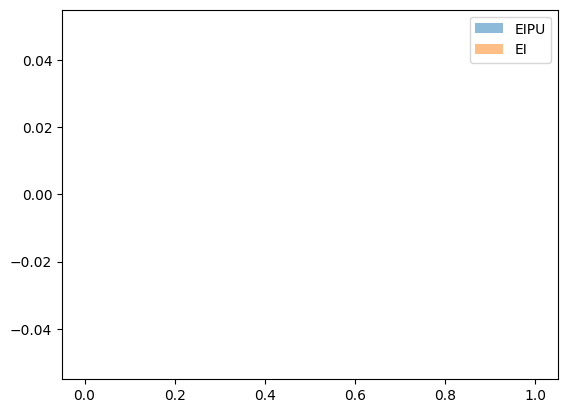

In [18]:
eipu_time = []
ei_time = []
for log in dir_list:
    if 'eipu' in log:
        if 'time' in log:
            eipu_time.append(float(log.split('_')[-1][:-5]))
    elif 'ei' in log:
        if 'time' in log:
            ei_time.append(float(log.split('_')[-1][:-5]))
            
plt.hist(eipu_time, alpha=0.5, label='EIPU')
plt.hist(ei_time, alpha=0.5, label='EI')
plt.legend()
plt.show()